In [1]:
%matplotlib inline

from functools import partial
from pathlib import Path 


import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.text as mtexts

from mpl_toolkits.axisartist.axislines import AxesZero


import papercolors as pc
from papercolors import colordict as pcd

paper_path = Path('../figures/')

fs={'normal': 10, 'small':9, 'footnote':8, 'script':7, 'tiny':5, 'heading':12}


In [2]:
packages = "\n".join( 
    [r"\usepackage{inputenc}", 
     r"\usepackage[T1]{fontenc}",
     r"\usepackage{cmbright}",
     r'\usepackage{{amsmath}}',
     r'\usepackage{{amssymb}}',
     r'\usepackage{{latexsym}}',
    ])
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = packages
mpl.rc('font', family='serif', serif="Times New Roman")
mpl.rcParams['figure.dpi']=300
mpl.rc("pgf", texsystem = "pdflatex", preamble = packages)

In [3]:
def bar(xy, width, height): # make partial so always create a new function
    return mpatches.Rectangle(xy, width, height, ec = pcd['section'], fc=(pcd['section'], .4), lw=.5)

In [4]:
b1y1 = .75
b2y2 = .075
x1 = 0.025
b1x1 = .775

bw = .05
gap = bw/2

data = [2, 4, 6]

# action(data) to viz, viz
def scale(di):
    return np.array(di)*.5

In [5]:
bar_transforms =  {"identity": {'function': lambda di, data: di*.01, 'symmetry':'HE'}, 
                   "exponent": {'function': lambda di, data: (di**3)*.001, 'symmetry':'H'}, 
                   "inverse" :{'function':lambda di, data: (1/di)*.1,'symmetry':'E'}}

In [6]:
# data to vis
boxes_data = {bt : {di: {'xy': (b1x1 + (bw+gap)*i, b1y1), 'width': bw, 'height': btd['function'](di, data)} for i, di in enumerate(data)} for bt, btd in bar_transforms.items()}

In [7]:
boxes_max = {}
boxes_scale = {}
for bt, btd in bar_transforms.items():
    boxes_scale[bt] = {'data':{}, 'vis':{}}
    boxes_max[bt] = {'data':{}, 'vis':{}}
    for i, (di, boxes) in enumerate(zip(data, boxes_data[bt].values())):
        boxes_scale[bt]['data'][di] = {'xy': (b1x1 + (bw+gap)*i, b2y2), 'width':bw, 'height': btd['function'](scale(di), scale(data))}
        boxes_scale[bt]['vis'][di] = {'xy': (b1x1 + (bw+gap)*i, b2y2), 'width':bw, 'height': scale(bar(**boxes_data[bt][di]).get_height())}
        
    boxes_max[bt]['data']['max'] = {'xy':(b1x1 + bw + gap, b2y2), 'width': bw, 'height': btd['function'](max(data), data)}
    boxes_max[bt]['vis']['max'] =  {'xy':(b1x1 + bw + gap, b2y2), 'width': bw, 'height': max(bar(**ba).get_height() for ba in boxes_data[bt].values())}

In [8]:
boxes_max['identity'], boxes_scale['identity']

({'data': {'max': {'xy': (0.8500000000000001, 0.075),
    'width': 0.05,
    'height': 0.06}},
  'vis': {'max': {'xy': (0.8500000000000001, 0.075),
    'width': 0.05,
    'height': 0.06}}},
 {'data': {2: {'xy': (0.775, 0.075),
    'width': 0.05,
    'height': np.float64(0.01)},
   4: {'xy': (0.8500000000000001, 0.075),
    'width': 0.05,
    'height': np.float64(0.02)},
   6: {'xy': (0.925, 0.075), 'width': 0.05, 'height': np.float64(0.03)}},
  'vis': {2: {'xy': (0.775, 0.075), 'width': 0.05, 'height': np.float64(0.01)},
   4: {'xy': (0.8500000000000001, 0.075),
    'width': 0.05,
    'height': np.float64(0.02)},
   6: {'xy': (0.925, 0.075), 'width': 0.05, 'height': np.float64(0.03)}}})

In [9]:
for name in bar_transforms:
    for boxes_dict in [boxes_max[name], boxes_scale[name]]:
        scale_v = [bar(**boxes_dict['vis'][key]).get_height() for key in boxes_dict['vis']]
        scale_d = [bar(**boxes_dict['data'][key]).get_height() for key in boxes_dict['data']]
        print(f"{name}, vis={scale_v}, data={scale_d}")

identity, vis=[0.06], data=[0.06]
identity, vis=[np.float64(0.01), np.float64(0.02), np.float64(0.03)], data=[np.float64(0.01), np.float64(0.02), np.float64(0.03)]
exponent, vis=[0.216], data=[0.216]
exponent, vis=[np.float64(0.004), np.float64(0.032), np.float64(0.108)], data=[np.float64(0.001), np.float64(0.008), np.float64(0.027)]
inverse, vis=[0.05], data=[0.016666666666666666]
inverse, vis=[np.float64(0.025), np.float64(0.0125), np.float64(0.008333333333333333)], data=[np.float64(0.1), np.float64(0.05), np.float64(0.03333333333333333)]


In [10]:
pcd.keys()

dict_keys(['total', 'fiber', 'base', 'section', 'artist', 'homset', 'action', 'monoid', 'sheaf', 'source', 'target', 'functor', 'nattran', 'set'])

In [11]:
def make_diagram(title, symmetry, action, action_label, boxes, boxes_func, savepath, action_label_orientation='v'):
    
    fig, axd = plt.subplot_mosaic([[name for name in bar_transforms]], figsize=(3.5, 1), layout='compressed')

    space = ("s", fig.get_facecolor())
    texts = [("Is", "k"), space, (r"$data \mapsto \Box$", pcd['artist']), space, (title[0], 'k'), space, 
             (title[1], pcd['action']), ("?", "k")]
    
    text = fig.text(.2, 0.98, texts[0][0], va = 'bottom', fontsize=fs['script'], color=texts[0][1])
    for txt, clr in texts[1:]:
        text = mtexts.Annotation(txt, xycoords=text, xy=(1, 0),  va = 'bottom', fontsize=fs['script'], color=clr)
        fig.add_artist(text)
    
    for fname, fdict  in bar_transforms.items():
        ax = axd[fname]
    
        boxes_data = []
        for di in data:
            boxes_data.append(box_data:=bar(**boxes[fname][di]))
            ax.add_patch(box_data)

        boxes_viz = []
        for key in boxes_func[fname]['vis']:
            ax.add_patch(box_viz:=bar(**boxes_func[fname]['vis'][key]))
            box_viz.set_facecolor(box_data.get_facecolor()) #I think some alpha blending is messing up the inital color
            boxes_viz.append(box_viz)
      
        if symmetry in fdict["symmetry"]:
            sym = "YES"
            color = "darkgreen"
            hdx = boxes_data[0]
        else:
            sym = "NO"
            color = "purple"
            for box_viz in boxes_viz:
                box_viz.set_y(box_viz.get_y() + gap*4)
            boxes_data_func = []
            for key in boxes_func[fname]['data']:
                ax.add_patch(box_data_func:=bar(**boxes_func[fname]['data'][key]))
                #box_data_func.set_x(box_data_func.get_x()-gap*4.5)
                #box_data_func.set_edgecolor(color)
                boxes_data_func.append(box_data_func)
                
            
        
            #ax.text(b1x1+4*gap, b2y2, r"$\textbf{?}$", ha='center', va='bottom', fontsize=fs['small'], color='.7', zorder=-6)
            hdx = boxes_data_func[0]

        
        text = ax.text(.5, -.05, f"{sym}", transform=ax.transAxes, va='top', ha='center', color=color, fontsize=fs['tiny'])
        #ax.annotate(f"{sym}", xycoords=text, xy=(1, 0), verticalalignment="bottom", color=color, weight="bold", fontsize=fs['tiny']) 
        ax.spines[:].set_color(color)
        ax.set(xticks=[], yticks=[], xlim=(0,1), ylim=(0,1), aspect='equal')
    
        # data side
        xy = ax.text(x1, b1y1, f"{",".join([str(i) for i in data])}", ha='left', va='bottom', fontsize=fs['tiny'], color=pcd['section'])
        
        ad = action(data)
        text = f"{ad}" if isinstance(ad, int) else f"{ad[0]:.0f},{ad[1]:.0f},{ad[2]:.0f}"
        
        xley = ax.annotate(text, xy=(0,0), xytext=(.5, b2y2), textcoords=(xy, 'data'), ha='center', va='bottom', fontsize=fs['tiny'], color=pcd['section'])
    
       # arrows: annotate: tail, head, tail=text, xy=head
        arrdd = ax.annotate(f"", (.475, 1), (.475,0), xycoords=(xy, xley) , textcoords= xy, 
                                        arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['action'])) 
        arrbb = ax.annotate(f"", (.475, 1), (.475,0), xycoords = boxes_viz[int(len(boxes_viz)//2)], textcoords = boxes_data[1], 
                                        arrowprops=dict(arrowstyle="->,widthA=.15, lengthA=0", color=pcd['action'])) 

        for arrows in [arrdd, arrbb]:
            if action_label_orientation == 'v':
                andd = ax.annotate(action_label, xy=(0,0), xytext=(.25, .55), textcoords=arrows, fontsize=fs['tiny'], color=pcd['action'], ha='right', va='center', rotation=90)
            else:
                andd = ax.annotate(action_label, xy=(0,0), xytext=(.25, .55), textcoords=arrows, fontsize=fs['tiny'], color=pcd['action'], ha='right', va='center')
        
        for tail, head in [ (xy, (boxes_data[0], xy)), (xley, (hdx, xley), )]  :
            a = ax.annotate("", (0, .5), (1, .5), xycoords=head, textcoords=tail,  arrowprops=dict(arrowstyle="->,widthA=.15,lengthA=0", color=pcd['artist']))
            lab = fname
            ax.annotate(lab, xy=(0,0), xytext =(.5, .85), textcoords=a, ha='center', va='bottom', color=pcd['artist'],  fontsize=fs['tiny'])
        
    
    fig.savefig(savepath, bbox_inches='tight', dpi=200)

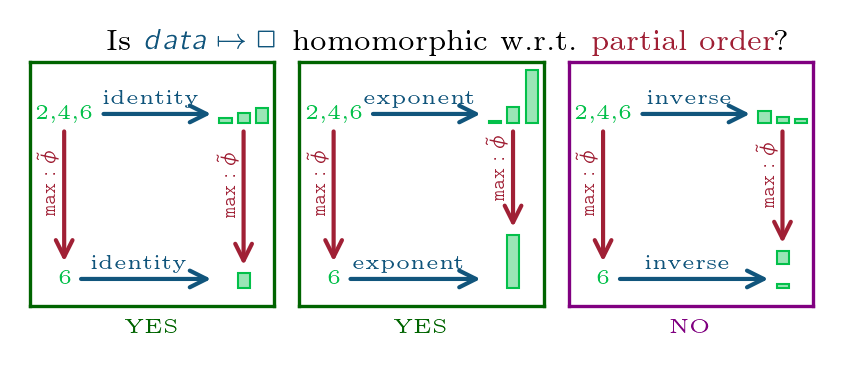

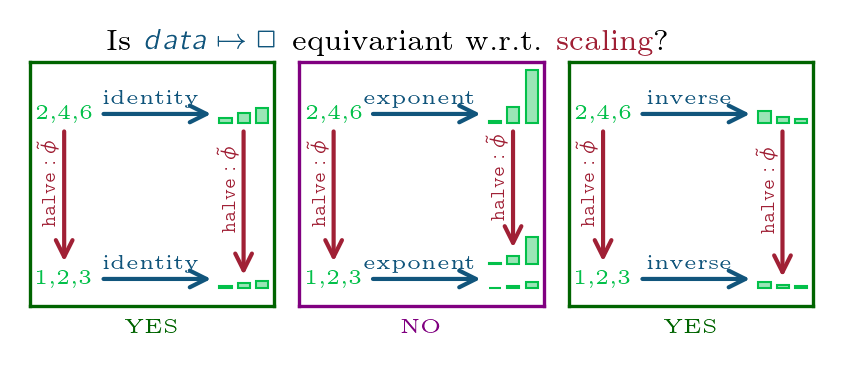

In [12]:
title = ("homomorphic w.r.t.", "partial order")
symmetry = "H"
savepath = paper_path/"homomorphism.pdf"
boxes_func = boxes_max
action = max
action_label = r"$\texttt{max}:\tilde{\phi}$"

make_diagram(title, symmetry, action, action_label, boxes_data, boxes_func, savepath, action_label_orientation='v')

title = ("equivariant w.r.t.", "scaling")
symmetry = "E"
savepath = paper_path/"equivariant.pdf"
boxes_func = boxes_scale
action =  scale
action_label = r"$\times\frac{1}{2}:\tilde{\phi}$"
action_label = r"$\texttt{halve}:\tilde{\phi}$"

make_diagram(title, symmetry, action, action_label, boxes_data, boxes_func, savepath, action_label_orientation ='v')
